#Question 1

Number of core points: 882
Number of border points: 882
Number of noise points: 1182

Core Points:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   

   population  households  median_income  median_house_value ocean_proximity  \
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   
5       413.0       193.0         4.0368            269700.0        NEAR BAY   
6      1094.0       514.0         3.6591            299200.0        NEAR BAY   
7      1157.0       647.0         3.1200          

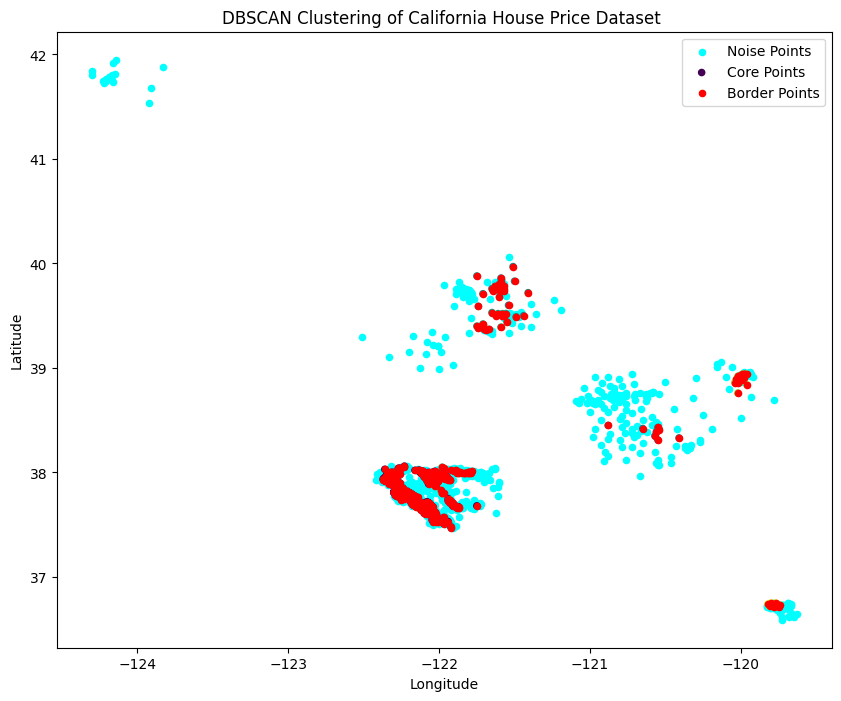

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "housing.csv"
data = pd.read_csv(file_path)

features = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms','population', 'households', 'median_income', 'median_house_value']]


imputed_features = features.copy()  
for column in features.columns:
    mean_value = features[column].mean()
    imputed_features[column].fillna(mean_value, inplace=True)

def standardize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data

features_scaled = standardize(imputed_features)

def dbscan(eps, min_samples, data):
    clusters = np.zeros(len(data))
    cluster_label = 0

    for point_index in range(len(data)):
        if clusters[point_index] != 0:
            continue

        neighbors = find_neighbors(point_index, eps, data)

        if len(neighbors) < min_samples:
            clusters[point_index] = -1  
        else:
            cluster_label += 1
            expand_cluster(point_index, neighbors, cluster_label, eps, min_samples, data, clusters)

    return clusters

def find_neighbors(point_index, eps, data):
    neighbors = []
    for i in range(len(data)):
        if np.linalg.norm(data.iloc[point_index] - data.iloc[i]) < eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(point_index, neighbors, cluster_label, eps, min_samples, data, clusters):
    clusters[point_index] = cluster_label

    i = 0
    while i < len(neighbors):
        current_neighbor = neighbors[i]
        if clusters[current_neighbor] == -1:  
            clusters[current_neighbor] = cluster_label
        elif clusters[current_neighbor] == 0: 
            clusters[current_neighbor] = cluster_label
            new_neighbors = find_neighbors(current_neighbor, eps, data)
            if len(new_neighbors) >= min_samples:
                neighbors += [n for n in new_neighbors if n not in neighbors and clusters[n] != -1]
        i += 1


eps = 0.5
min_samples = 5

clusters = dbscan(eps, min_samples, features_scaled)

data['cluster'] = clusters

core_points = data[data['cluster'] != -1]
border_points = data[(data['cluster'] != -1) & (data['cluster'] != 0)]
noise_points = data[data['cluster'] == -1]

print(f"Number of core points: {len(core_points)}")
print(f"Number of border points: {len(border_points)}")
print(f"Number of noise points: {len(noise_points)}")

print("\nCore Points:")
print(core_points.head())
print("\nBorder Points:")
print(border_points.head())
print("\nNoise Points:")
print(noise_points.head())

plt.figure(figsize=(10, 8))
plt.scatter(data.loc[clusters == -1, 'longitude'], data.loc[clusters == -1, 'latitude'],c='cyan', s=20, label='Noise Points')
plt.scatter(core_points['longitude'], core_points['latitude'],c=core_points['cluster'], cmap='viridis', s=20, label='Core Points')
plt.scatter(border_points['longitude'], border_points['latitude'],c='red', s=20, label='Border Points')


plt.title('DBSCAN Clustering of California House Price Dataset ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


#Question 2

Silhouette Score: -0.31210385953327996


Number of core points: 885
Number of border points: 169
Number of noise points: 1179


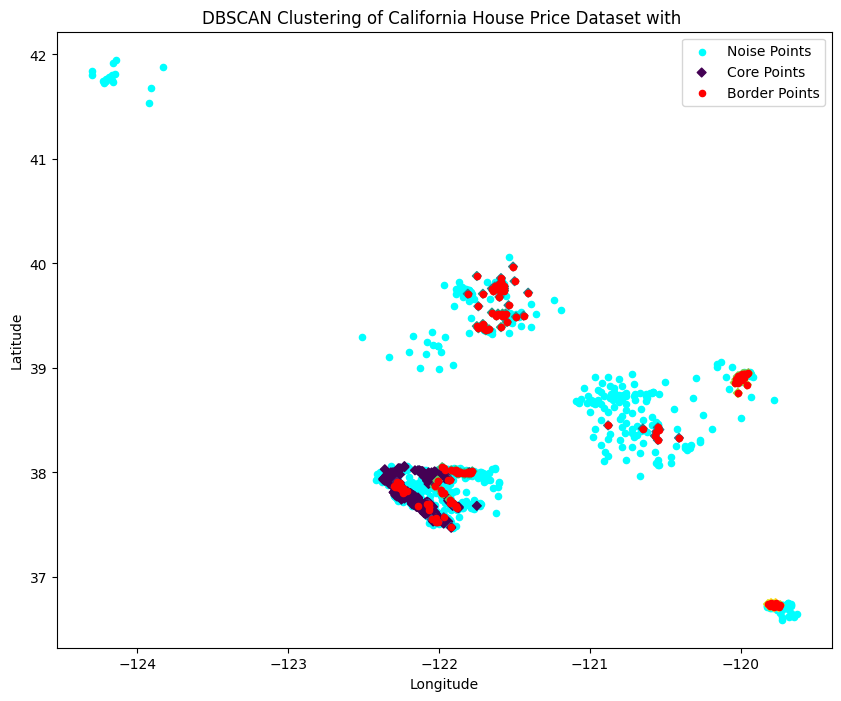

In [72]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

file_path = "housing.csv"
data = pd.read_csv(file_path)

features = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms','population', 'households', 'median_income', 'median_house_value']]

imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(features_scaled)

silhouette_avg = silhouette_score(features_scaled, clusters)

print(f"Silhouette Score: {silhouette_avg}\n\n")

data['cluster'] = clusters

core_points = data[data['cluster'] != -1]
border_points = data[(data['cluster'] != -1) & (data['cluster'] != 0)]
noise_points = data[data['cluster'] == -1]

print(f"Number of core points: {len(core_points)}")
print(f"Number of border points: {len(border_points)}")
print(f"Number of noise points: {len(noise_points)}")

plt.figure(figsize=(10, 8))
plt.scatter(data.loc[clusters == -1, 'longitude'], data.loc[clusters == -1, 'latitude'],c='cyan', s=20, label='Noise Points')
plt.scatter(core_points['longitude'], core_points['latitude'],c=core_points['cluster'], cmap='viridis', s=20, label='Core Points', marker='D')
plt.scatter(border_points['longitude'], border_points['latitude'],c='red', s=20, label='Border Points')


plt.title('DBSCAN Clustering of California House Price Dataset with ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
# Load the dataset
data = pd.read_csv("CreditCard.csv")

# Select the relevant columns for clustering
X = data.iloc[:, 2:].values  # Use columns from 'Avg_Credit_Limit' to 'Total_calls_made'

# Standardize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

# Define linkage functions
def single_linkage(cluster1, cluster2):
    min_dist = float('inf')
    for point1 in cluster1:
        for point2 in cluster2:
            dist = np.linalg.norm(X[point1] - X[point2])
            if dist < min_dist:
                min_dist = dist
    return min_dist

def complete_linkage(cluster1, cluster2):
    max_dist = 0
    for point1 in cluster1:
        for point2 in cluster2:
            dist = np.linalg.norm(X[point1] - X[point2])
            if dist > max_dist:
                max_dist = dist
    return max_dist

def average_linkage(cluster1, cluster2):
    total_dist = 0
    count = 0
    for point1 in cluster1:
        for point2 in cluster2:
            total_dist += np.linalg.norm(X[point1] - X[point2])
            count += 1
    return total_dist / count

def centroid_linkage(cluster1, cluster2):
    centroid1 = np.mean(X[list(cluster1)], axis=0)
    centroid2 = np.mean(X[list(cluster2)], axis=0)
    return np.linalg.norm(centroid1 - centroid2)

# Initialize clusters
clusters = [{i} for i in range(len(X))]

# Define linkage method
linkage_methods = ['Single', 'Complete', 'Average', 'Centroid']

# Initialize the linkage matrix
linkage_matrix = []

while len(clusters) > 1:
    min_distance = float('inf')
    merge_clusters = (0, 0)

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            for method in linkage_methods:
                if method == 'Single':
                    distance = single_linkage(clusters[i], clusters[j])
                elif method == 'Complete':
                    distance = complete_linkage(clusters[i], clusters[j])
                elif method == 'Average':
                    distance = average_linkage(clusters[i], clusters[j])
                elif method == 'Centroid':
                    distance = centroid_linkage(clusters[i], clusters[j])

                if distance < min_distance:
                    min_distance = distance
                    merge_clusters = (i, j)
                    linkage_method = method

    cluster1, cluster2 = clusters.pop(merge_clusters[1]), clusters.pop(merge_clusters[0])
    clusters.append(cluster1.union(cluster2))
    linkage_matrix.append([list(cluster1)[0], list(cluster2)[0], min_distance, len(cluster1) + len(cluster2)])

# Plot the dendrogram
linkage_matrix = np.array(linkage_matrix)
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=data['Customer Key'].astype(str).values, orientation='top')
plt.title('Dendrogram')
plt.show()


KeyboardInterrupt: 

In [6]:
print(linkage_matrix)

[[162.          17.           0.           2.        ]
 [215.          29.           0.           2.        ]
 [175.          56.           0.           2.        ]
 ...
 [  2.           0.           1.36611611 609.        ]
 [  0.         640.           1.70672464 659.        ]
 [  0.           1.           1.92949629 660.        ]]
